In [1]:
# Load neccessary modules
import matplotlib.pyplot as plt
import seaborn as sns

import time


from typing import Any, Dict, Optional, Tuple, List
import numpy as np
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
)

In [2]:
# Import custom model and helpers
from src import (
    LogisticRegression,
    ExperimentRunner,
    compute_classification_metrics,
    compute_roc_metrics,
    plot_cost_history,
    plot_learning_rate_comparison,
    plot_confusion_matrix,
    plot_roc_curve
)


In [3]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

feature_names = data.feature_names.tolist()
dataset_info = {
    'name': 'Breast Cancer Wisconsin',
    'n_samples': X.shape[0],
    'n_features': X.shape[1],
    'n_classes': len(np.unique(y)),
    'class_names': data.target_names.tolist(),
    'description': 'Breast cancer diagnosis dataset (malignant vs benign)'
}

print(f"Loaded {dataset_info['name']} dataset:")
print(f"  - Samples: {dataset_info['n_samples']}")
print(f"  - Features: {dataset_info['n_features']}")
print(f"  - Classes: {dataset_info['class_names']}")

Loaded Breast Cancer Wisconsin dataset:
  - Samples: 569
  - Features: 30
  - Classes: ['malignant', 'benign']


In [4]:
# Split data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
# Data preprocessing: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Print preprocessing info
print(f"\nData preprocessing complete:")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Test samples: {len(X_test)}")
print(f"  - Feature scaling: {type(scaler).__name__}")
print(f"  - Feature ranges after scaling:")
print(f"    - Min: {X_train.min():.3f}")
print(f"    - Max: {X_train.max():.3f}")
print(f"    - Mean: {X_train.mean():.3f}")
print(f"    - Std: {X_train.std():.3f}")


Data preprocessing complete:
  - Training samples: 455
  - Test samples: 114
  - Feature scaling: StandardScaler
  - Feature ranges after scaling:
    - Min: -2.715
    - Max: 11.658
    - Mean: -0.000
    - Std: 1.000


In [6]:
# Train model
print("\nTraining logistic regression model...")
model = LogisticRegression(learning_rate=0.01, max_iterations=1000, verbose=True)
model.fit(X_train, y_train)


Training logistic regression model...
Iteration 100/1000, Cost: 0.246446
Iteration 200/1000, Cost: 0.182715
Iteration 300/1000, Cost: 0.154062
Iteration 400/1000, Cost: 0.137183
Iteration 500/1000, Cost: 0.125845
Iteration 600/1000, Cost: 0.117595
Iteration 700/1000, Cost: 0.111261
Iteration 800/1000, Cost: 0.106207
Iteration 900/1000, Cost: 0.102056
Iteration 1000/1000, Cost: 0.098571


LogisticRegression(learning_rate=0.01, max_iterations=1000, regularization=None, lambda_reg=0.01)

In [7]:
# Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


Making predictions...


In [8]:
# Evaluate performance
metrics = compute_classification_metrics(y_test, y_pred)
print(f"\nMODEL PERFORMANCE:")
print(f"  Accuracy:  {metrics['accuracy']:.4f}")
print(f"  Precision: {metrics['precision']:.4f}")
print(f"  Recall:    {metrics['recall']:.4f}")
print(f"  F1-Score:  {metrics['f1_score']:.4f}")


MODEL PERFORMANCE:
  Accuracy:  0.9737
  Precision: 0.9859
  Recall:    0.9722
  F1-Score:  0.9790


In [9]:
# Training history
history = model.get_training_history()
print(f"\nTRAINING SUMMARY:")
print(f"  Final cost: {history['final_cost']:.6f}")
print(f"  Iterations: {history['iterations']}")
print(f"  Converged: {'Yes' if history['converged'] else 'No'}")


TRAINING SUMMARY:
  Final cost: 0.098571
  Iterations: 1000
  Converged: No


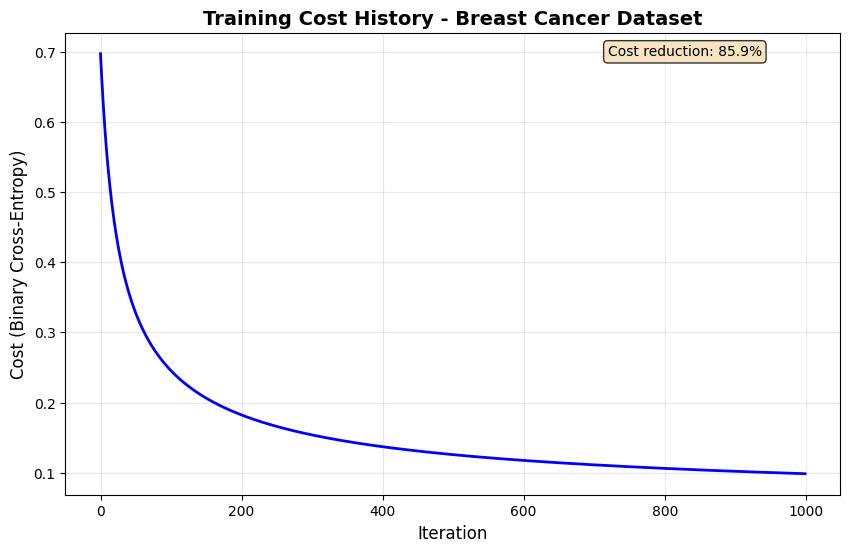

In [10]:
plot_cost_history(
    history["cost_history"],
    title="Training Cost History - Breast Cancer Dataset"
)

Generating confusion matrix...


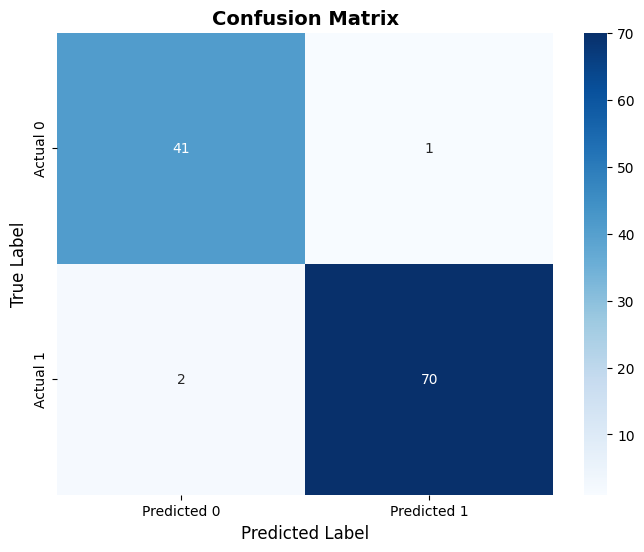

In [11]:
print("Generating confusion matrix...")
plot_confusion_matrix(y_test, y_pred)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Generating ROC curve...


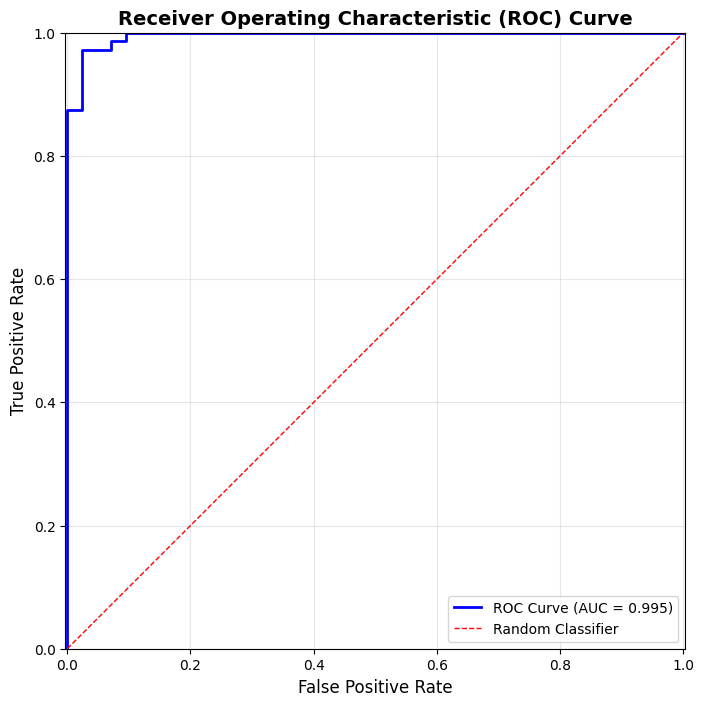

In [12]:
# Plot ROC curve
print("Generating ROC curve...")
plot_roc_curve(y_test, y_proba)

Running individual experiments...

Learning Rate Analysis:
Experimenting with different learning rates...
Learning rates to test: [0.001, 0.01, 0.1, 1.0]
\nTesting learning rate 0.001 (1/4)
  Final cost: 0.246132
  Iterations: 1000
  Test accuracy: 0.9474
  Training time: 0.590s
\nTesting learning rate 0.01 (2/4)
  Final cost: 0.098882
  Iterations: 1000
  Test accuracy: 0.9737
  Training time: 1.160s
\nTesting learning rate 0.1 (3/4)
  Final cost: 0.056589
  Iterations: 1000
  Test accuracy: 0.9737
  Training time: 0.789s
\nTesting learning rate 1.0 (4/4)
  Final cost: 0.041933
  Iterations: 1000
  Test accuracy: 0.9825
  Training time: 1.437s
\Learning Rate Experiment Summary:
  LR  0.001: Accuracy=0.9474, Max iterations
  LR   0.01: Accuracy=0.9737, Max iterations
  LR    0.1: Accuracy=0.9737, Max iterations
  LR    1.0: Accuracy=0.9825, Max iterations

Regularization Analysis:
Experimenting with different regularization strengths...
Lambda values to test: [0, 0.001, 0.01, 0.1, 1.0]

ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x1045f8fa0>>)
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 100, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 439-440: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/iostream.py", line 649, in _flush
    self.session.send(
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 852, in send
    to_send = self.serialize(msg, ident)
         

\nComparison with scikit-learn:
  Our accuracy:      0.9737
  Sklearn accuracy:  0.9825
  Prediction agreement: 0.9912
  Probability MAE:   0.052193
  Weight difference: 2.305943
  Bias difference:   0.003652
  Status: Implementations differ

Generating experiment plots...
Generating experiment plots...


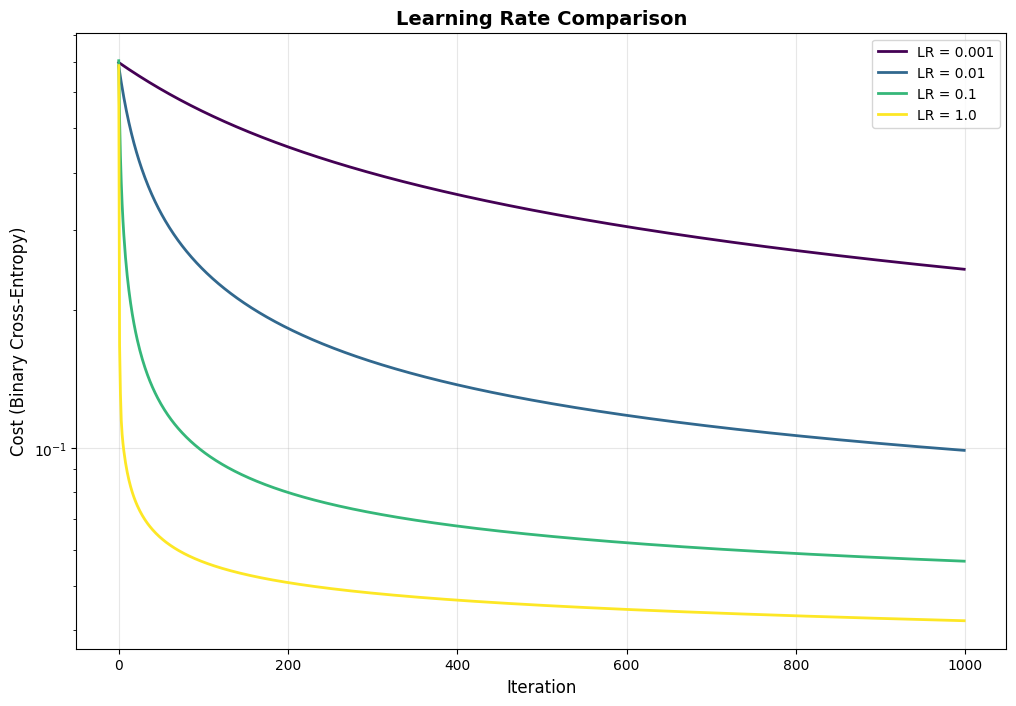

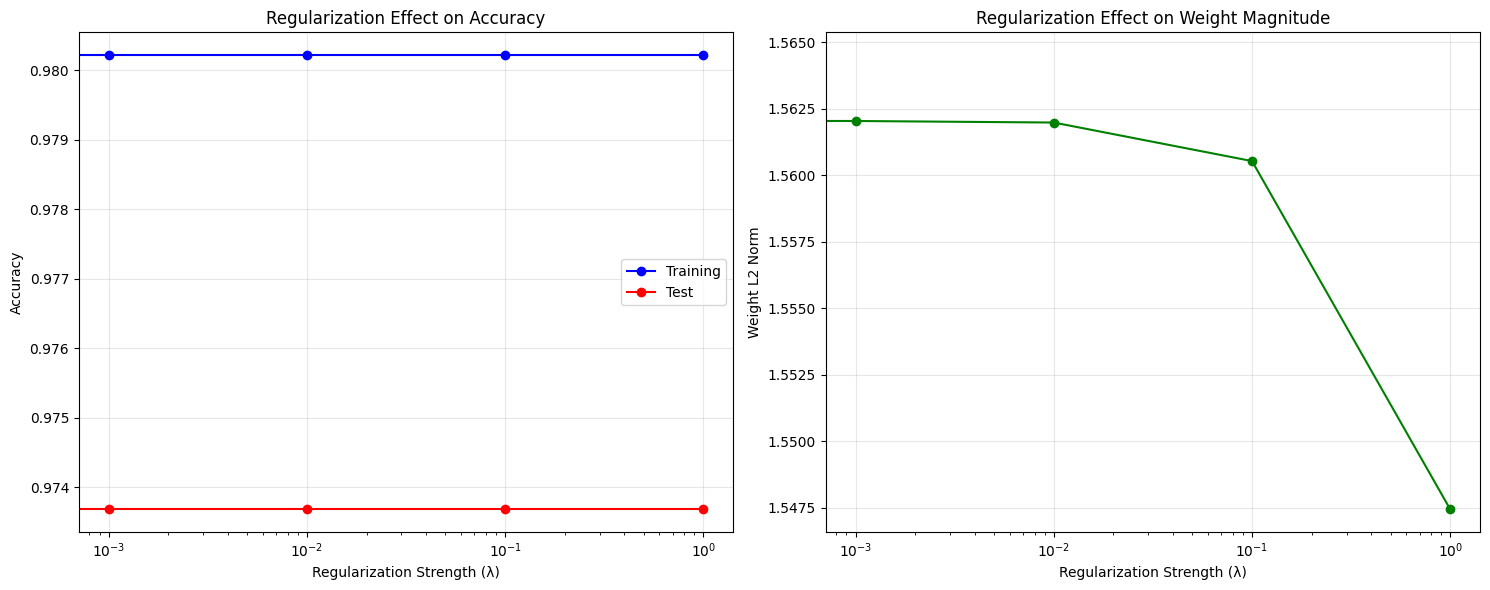

In [13]:
# Individual experiments
print("Running individual experiments...")
runner = ExperimentRunner(random_state=42)

# Learning rate experiment
print("\nLearning Rate Analysis:")
lr_results = runner.experiment_learning_rates(X_train, y_train, X_test, y_test)

# Regularization experiment
print("\nRegularization Analysis:")
reg_results = runner.experiment_regularization(X_train, y_train, X_test, y_test)

# Comparison with scikit-learn
print("\nScikit-learn Comparison:")
comparison = runner.compare_with_sklearn(X_train, y_train, X_test, y_test)

# Generate experiment plots
print("\nGenerating experiment plots...")
runner.plot_experiment_results()

In [14]:
# Compare models with and without regularization
print("Training models with different regularization strengths...")

models = {
    'No Regularization': LogisticRegression(learning_rate=0.01, max_iterations=1000),
    'L2 (λ=0.01)': LogisticRegression(learning_rate=0.01, max_iterations=1000,
                                        regularization='l2', lambda_reg=0.01),
    'L2 (λ=1.0)': LogisticRegression(learning_rate=0.01, max_iterations=1000,
                                    regularization='l2', lambda_reg=1.0)
}

reg_results = {}
for name, model_reg in models.items():
    model_reg.fit(X_train, y_train)
    y_pred_reg = model_reg.predict(X_test)
    metrics_reg = compute_classification_metrics(y_test, y_pred_reg)
    weight_norm = np.linalg.norm(model_reg.weights_)

    reg_results[name] = {
        'accuracy': metrics_reg['accuracy'],
        'weight_norm': weight_norm
    }

    print(f"  {name:20}: Accuracy={metrics_reg['accuracy']:.4f}, ||w||={weight_norm:.4f}")

Training models with different regularization strengths...
  No Regularization   : Accuracy=0.9737, ||w||=1.5601
  L2 (λ=0.01)         : Accuracy=0.9649, ||w||=1.5608
  L2 (λ=1.0)          : Accuracy=0.9737, ||w||=1.5446


In [15]:
# Run experiments
runner.experiment_learning_rates(X_train, y_train, X_test, y_test)
runner.experiment_regularization(X_train, y_train, X_test, y_test)
runner.compare_with_sklearn(X_train, y_train, X_test, y_test)
runner.convergence_analysis(X_train, y_train)

X_full = np.vstack((X_train, X_test))
y_full = np.hstack((y_train, y_test))
runner.cross_validation_analysis(X_full, y_full)

Experimenting with different learning rates...
Learning rates to test: [0.001, 0.01, 0.1, 1.0]
\nTesting learning rate 0.001 (1/4)
  Final cost: 0.245404
  Iterations: 1000
  Test accuracy: 0.9474
  Training time: 4.454s
\nTesting learning rate 0.01 (2/4)
  Final cost: 0.098600
  Iterations: 1000
  Test accuracy: 0.9737
  Training time: 2.103s
\nTesting learning rate 0.1 (3/4)
  Final cost: 0.056671
  Iterations: 1000
  Test accuracy: 0.9737
  Training time: 1.589s
\nTesting learning rate 1.0 (4/4)
  Final cost: 0.041955
  Iterations: 1000
  Test accuracy: 0.9825
  Training time: 0.093s
\Learning Rate Experiment Summary:
  LR  0.001: Accuracy=0.9474, Max iterations
  LR   0.01: Accuracy=0.9737, Max iterations
  LR    0.1: Accuracy=0.9737, Max iterations
  LR    1.0: Accuracy=0.9825, Max iterations
Experimenting with different regularization strengths...
Lambda values to test: [0, 0.001, 0.01, 0.1, 1.0]
\nTesting lambda = 0 (1/5)
  Train accuracy: 0.9802
  Test accuracy: 0.9737
  Weight

ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x1045f8fa0>>)
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 100, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 411-412: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/iostream.py", line 649, in _flush
    self.session.send(
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 852, in send
    to_send = self.serialize(msg, ident)
         

\nCross-Validation Results:
  Mean accuracy: 0.9859 ± 0.0090
  Individual scores: ['0.9737', '0.9825', '1.0000', '0.9912', '0.9823']


ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x1045f8fa0>>)
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 100, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 309-310: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/iostream.py", line 649, in _flush
    self.session.send(
  File "/opt/homebrew/lib/python3.11/site-packages/jupyter_client/session.py", line 852, in send
    to_send = self.serialize(msg, ident)
         

{'cv_scores': array([0.97368421, 0.98245614, 1.        , 0.99122807, 0.98230088]),
 'mean_score': 0.9859338612016767,
 'std_score': 0.008958034491331946,
 'cv_folds': 5}